In [1]:
import stats
import pandas as pd
import msgpack
import warnings

In [13]:
def _stats(datum):
    em = datum["embedding"]
    n_responses = datum["meta"]["n_responses"]
    fnames = pd.read_csv("targets.csv.zip", header=None)[0].tolist()
    targets = [int(f.strip("i.png")) for f in fnames]
    targets = list(sorted(targets))

    X_test = [
        [i_h, i_l, i_r] if abs(h - l) < abs(h - r) else [i_h, i_r, i_l]
        for i_h, h in enumerate(targets)
        for i_l, l in enumerate(targets)
        for i_r, r in enumerate(targets)
        if h not in [l, r] and l != r
    ]

    s = stats.collect(em, targets, X_test)
    meta2 = {f"meta__{k}": v for k, v in datum["meta"].items()}
    return {**s, **meta2}

def process(file, **kwargs):
    with open(file, "rb") as f:
        history = msgpack.load(f)
    data = [_stats(hist) for hist in history]
    return [{**kwargs, **d} for d in data]

show = []
rate = 2
for file in [
    f"salmon/io/2021-05-21/ARR-{rate}_history.msgpack",
    f"next/io/2021-05-21/rate={rate}_history.msgpack",
]:
    system = file.split("/")[0]
    if "=42" in file:
        system = "salmon-42"

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning)
        show.extend(process(file, rate=rate, system=system))


In [16]:
df = pd.DataFrame(show)
df.columns

Index(['rate', 'system', 'accuracy', 'nn_diff_median', 'nn_diff_mean',
       'nn_acc', 'avg_items_closer_than_NN', 'nn_diff_p99', 'nn_diff_p98',
       'nn_diff_p95', 'nn_diff_p90', 'nn_diff_p80', 'nn_diff_p70',
       'nn_diff_p60', 'nn_diff_p50', 'nn_diff_p40', 'nn_diff_p30',
       'nn_diff_p20', 'nn_diff_p10', 'nn_diff_p5', 'nn_diff_p2', 'nn_diff_p1',
       'embedding_error', 'embedding_rel_error', 'procrustes_disparity',
       'nn_acc_radius_0', 'nn_acc_radius_1', 'nn_acc_radius_2',
       'nn_acc_radius_3', 'nn_acc_radius_4', 'nn_acc_radius_5',
       'nn_acc_radius_6', 'nn_acc_radius_7', 'nn_acc_radius_8',
       'nn_acc_radius_9', 'nn_acc_radius_10', 'nn_acc_radius_11',
       'nn_acc_radius_12', 'nn_acc_radius_13', 'nn_acc_radius_14',
       'nn_acc_radius_15', 'nn_acc_radius_16', 'nn_acc_radius_17',
       'nn_acc_radius_18', 'nn_acc_radius_19', 'nn_acc_radius_20',
       'nn_acc_radius_21', 'nn_acc_radius_22', 'nn_acc_radius_23',
       'nn_acc_radius_24', 'nn_acc_radius_

In [17]:
idx = df.system == "salmon"
df.loc[idx, "meta__n_responses"] -= 240

In [18]:
df.groupby("system")["meta__n_responses"].max()

system
next      1546
salmon    3764
Name: meta__n_responses, dtype: int64

In [19]:
df.columns

Index(['rate', 'system', 'accuracy', 'nn_diff_median', 'nn_diff_mean',
       'nn_acc', 'avg_items_closer_than_NN', 'nn_diff_p99', 'nn_diff_p98',
       'nn_diff_p95', 'nn_diff_p90', 'nn_diff_p80', 'nn_diff_p70',
       'nn_diff_p60', 'nn_diff_p50', 'nn_diff_p40', 'nn_diff_p30',
       'nn_diff_p20', 'nn_diff_p10', 'nn_diff_p5', 'nn_diff_p2', 'nn_diff_p1',
       'embedding_error', 'embedding_rel_error', 'procrustes_disparity',
       'nn_acc_radius_0', 'nn_acc_radius_1', 'nn_acc_radius_2',
       'nn_acc_radius_3', 'nn_acc_radius_4', 'nn_acc_radius_5',
       'nn_acc_radius_6', 'nn_acc_radius_7', 'nn_acc_radius_8',
       'nn_acc_radius_9', 'nn_acc_radius_10', 'nn_acc_radius_11',
       'nn_acc_radius_12', 'nn_acc_radius_13', 'nn_acc_radius_14',
       'nn_acc_radius_15', 'nn_acc_radius_16', 'nn_acc_radius_17',
       'nn_acc_radius_18', 'nn_acc_radius_19', 'nn_acc_radius_20',
       'nn_acc_radius_21', 'nn_acc_radius_22', 'nn_acc_radius_23',
       'nn_acc_radius_24', 'nn_acc_radius_

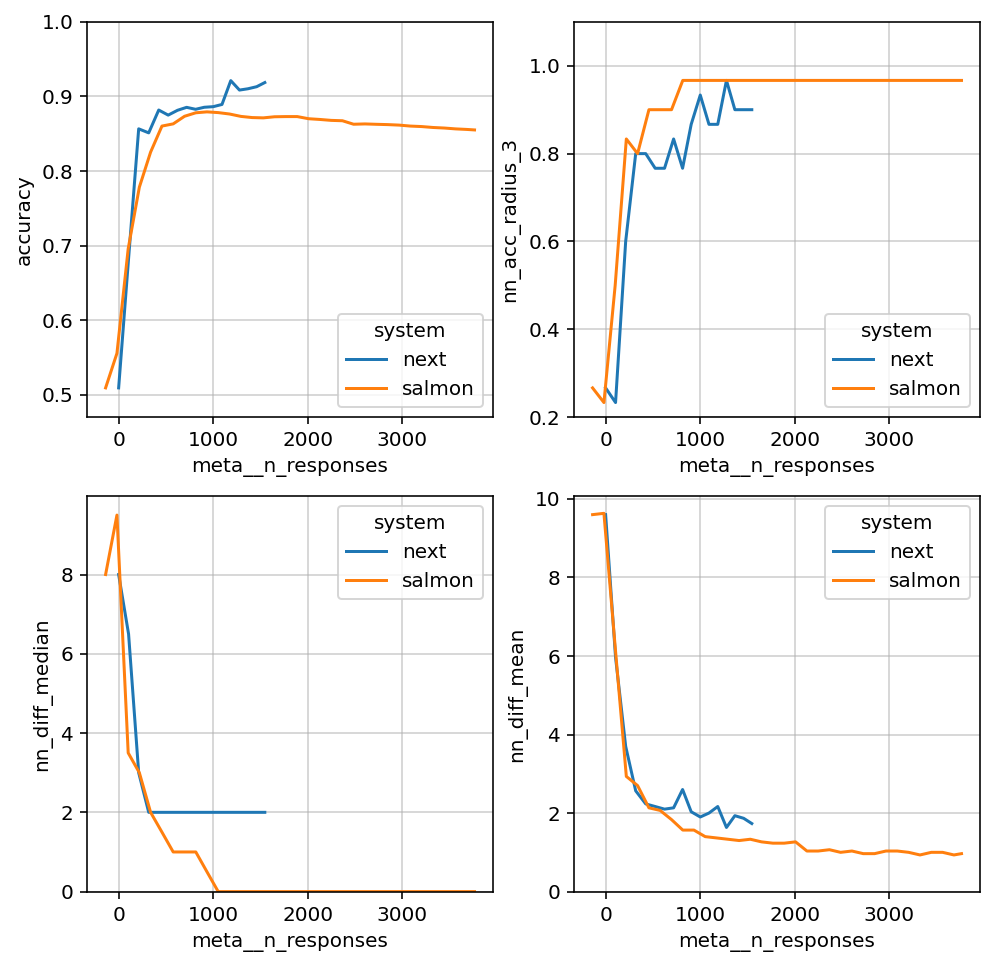

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

w = 4
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(2 * w, 2 * w))
kwargs = dict(
    x="meta__n_responses",
    hue="system",
    hue_order=["next", "salmon"],
    data=df,
)
ax = sns.lineplot(y="accuracy", ax=axs[0][0], **kwargs)
ax.set_ylim(0.47, 1)

ax = sns.lineplot(y="nn_acc_radius_3", ax=axs[0][1], **kwargs)
ax.set_ylim(0.2, 1.1)

ax = sns.lineplot(y="nn_diff_median", ax=axs[1][0], **kwargs)
ax.set_ylim(0, None)

ax = sns.lineplot(y="nn_diff_mean", ax=axs[1][1], **kwargs)
ax.set_ylim(0, None)

for ax in axs.flatten():
    ax.grid(alpha=0.6)